## Data Pre-Processing

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_path = "C:/Users/rahil/Desktop/DSBA Master/DSBA 2nd year Spring/RR/final project/RR_project_HHRPTeam/data/german_credit_data.csv"
data = pd.read_csv(data_path)


In [3]:
data.shape

(1000, 11)

In [4]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


 Removing redundant column 

In [7]:

data.drop("Unnamed: 0", axis = 1, inplace = True)

### Filling missing values

In [8]:
data.isnull().values.any()

True

In [9]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

The dataset comprises 1,000 entries, with 183 entries lacking data in the Savings Account attribute, accounting for 18.3% of the total records. Consequently, we will employ the Most Common Technique to impute these missing values.

In [10]:
savings_mode = data['Saving accounts'].mode()
savings_mode

0    little
Name: Saving accounts, dtype: object

In [11]:
data['Saving accounts'].fillna(savings_mode[0], inplace=True)
data['Saving accounts'].isnull().sum()

0

There are plenty of missing records in the Checking Account attribute, so it would be appropriate to fill in these values rather than remove them to improve the analysis of the data set.

In [12]:
check_mode = data['Checking account'].mode()
check_mode

0    little
Name: Checking account, dtype: object

In [13]:
data['Checking account'].fillna(check_mode[0], inplace=True)
data['Checking account'].isnull().sum()

0

In [14]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

Target Variable

In [15]:
data["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

### Encoding


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Identifying binary and nominal categorical columns
binary_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() == 2]
nominal_cols = [col for col in data.columns if data[col].dtype == 'object' and data[col].nunique() > 2]

In [18]:

# Label encode binary columns directly using pandas
for col in binary_cols:
    data[col] = data[col].astype('category').cat.codes

In [19]:

# One-hot encode nominal columns using pandas get_dummies
data = pd.get_dummies(data, columns=nominal_cols, drop_first=True)


In [20]:

# Calculating Pearson Correlation Coefficients
correlation_matrix = data.corr()
target_correlation = correlation_matrix['Risk'].sort_values(ascending=False) 

print(target_correlation)


Risk                           1.000000
Housing_own                    0.134589
Purpose_radio/TV               0.106922
Age                            0.091127
Saving accounts_rich           0.085749
Sex                            0.075493
Saving accounts_quite rich     0.070954
Checking account_rich          0.044009
Purpose_domestic appliances   -0.008016
Purpose_repairs               -0.020828
Purpose_furniture/equipment   -0.020971
Saving accounts_moderate      -0.022255
Purpose_car                   -0.022621
Purpose_vacation/others       -0.028058
Job                           -0.032735
Purpose_education             -0.049085
Housing_rent                  -0.092785
Checking account_moderate     -0.119581
Credit amount                 -0.154739
Duration                      -0.214927
Name: Risk, dtype: float64


In [21]:

# Selecting features based on a correlation threshold
threshold = 0.1 
selected_features = target_correlation[abs(target_correlation) > threshold].index.tolist()
print("Selected features based on Pearson correlation:", selected_features)

Selected features based on Pearson correlation: ['Risk', 'Housing_own', 'Purpose_radio/TV', 'Checking account_moderate', 'Credit amount', 'Duration']


Selected Features:

Housing_own: 0.134589

Purpose_radio/TV: 0.106922

Checking account_moderate: -0.119581

Credit amount: -0.154739

Duration: -0.214927

## Exploratory  Data Analysis

C:\Users\rahil\AppData\Local\Temp\ipykernel_16048\4239168787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Risk'], palette='coolwarm')


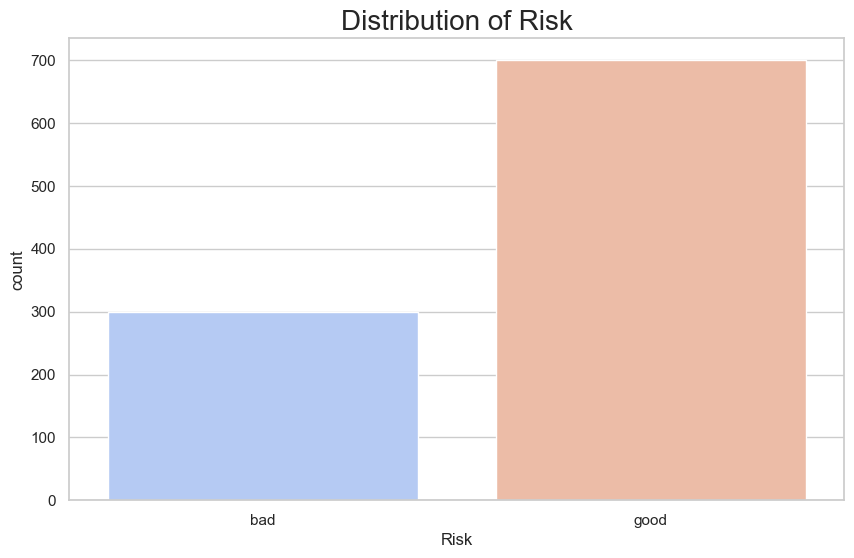

In [49]:
# Analysing target feature

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Risk'], palette='coolwarm')
plt.title('Distribution of Risk', fontsize=20)
plt.show()

The chart labeled "Distribution of Risk" illustrates that instances labeled as "good" risk are significantly more frequent than those labeled as "bad" risk in the dataset, indicating an imbalance. To address this, we must employ suitable methods to balance the data.

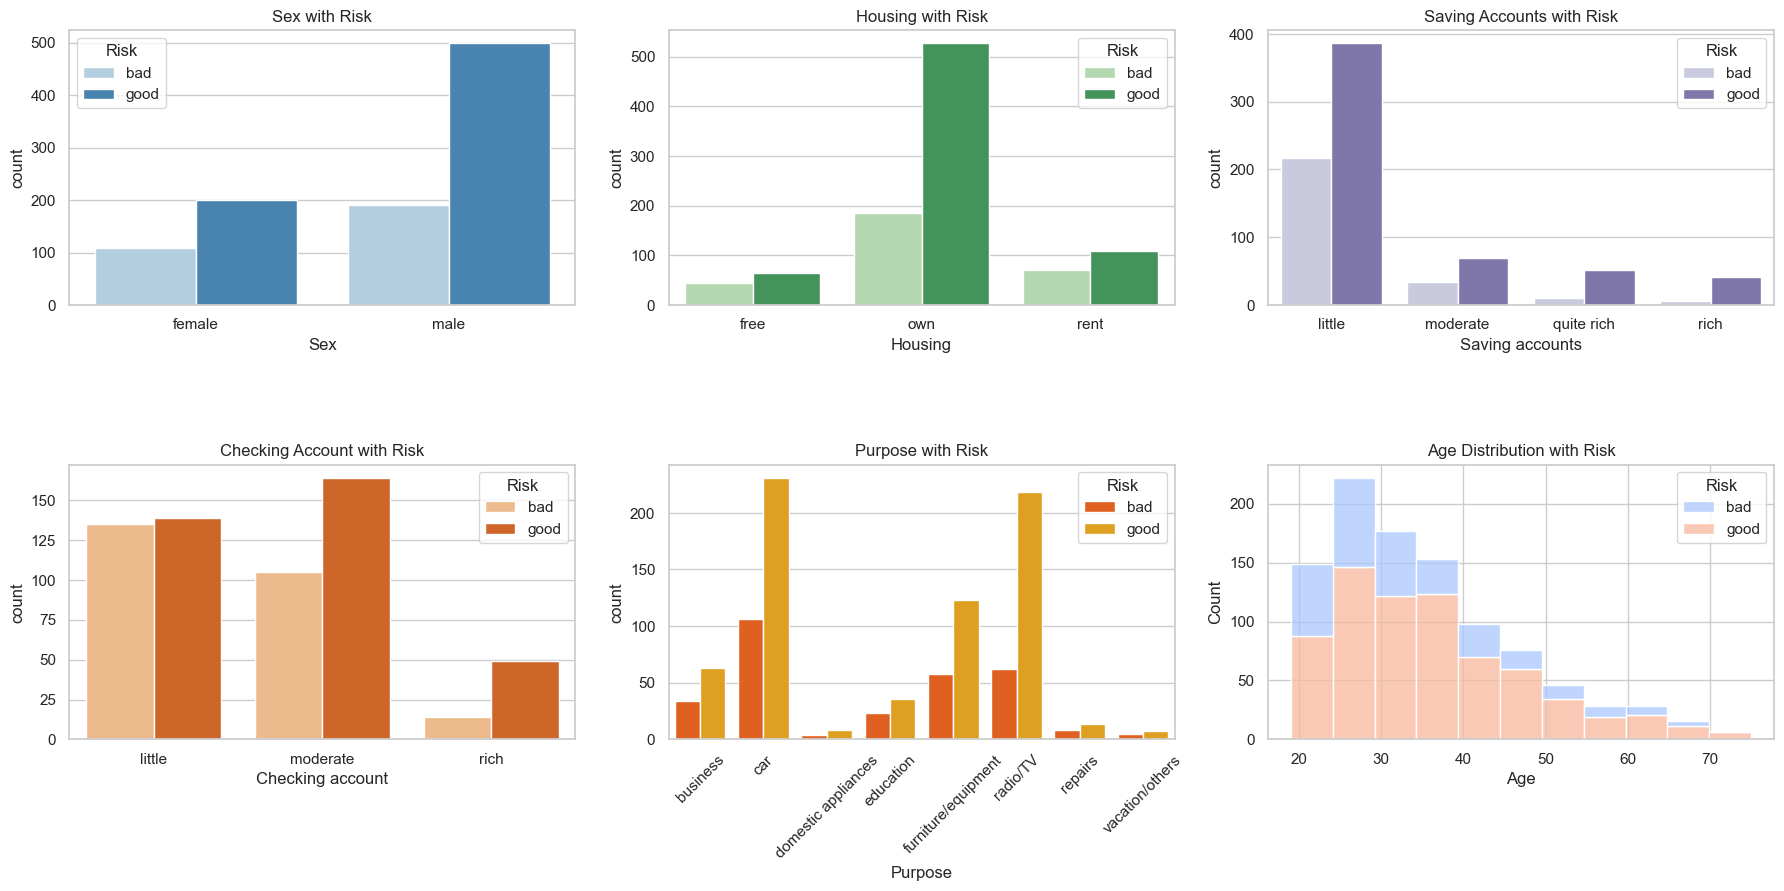

In [57]:
# Creating subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))  # Adjust the layout size as needed

# Sex vs Risk
sns.countplot(ax=axes[0, 0], x='Sex', hue='Risk', data=data, palette='Blues')
axes[0, 0].set_title('Sex with Risk')

# Housing vs Risk
sns.countplot(ax=axes[0, 1], x='Housing', hue='Risk', data=data, palette='Greens')
axes[0, 1].set_title('Housing with Risk')

# Saving accounts vs Risk
sns.countplot(ax=axes[0, 2], x='Saving accounts', hue='Risk', data=data, palette='Purples')
axes[0, 2].set_title('Saving Accounts with Risk')

# Checking account vs Risk
sns.countplot(ax=axes[1, 0], x='Checking account', hue='Risk', data=data, palette='Oranges')
axes[1, 0].set_title('Checking Account with Risk')

# Purpose vs Risk
sns.countplot(ax=axes[1, 1], x='Purpose', hue='Risk', data=data, palette='autumn')
axes[1, 1].set_title('Purpose with Risk')
axes[1, 1].tick_params(axis='x', rotation=45)  

# Age Distribution with Risk
sns.histplot(ax=axes[1, 2], data=data, x='Age', hue='Risk', multiple="stack", palette='coolwarm', binwidth=5)
axes[1, 2].set_title('Age Distribution with Risk')

# Remove empty plots if any
for i in range(2, 3):
    for j in range(0, 3):
        axes[i, j].set_visible(False)

plt.tight_layout()
plt.show()

Each plot collectively highlights how different demographic and financial factors correlate with the risk assessment in the dataset, providing insights into which factors might influence risk categorization.

Sex with Risk:
Males are represented with higher counts in both risk categories, especially in the 'good' risk category, indicating a higher number of males in the dataset.

Housing with Risk:
Individuals owning their houses show significantly higher counts of 'good' risk compared to 'bad', suggesting that home ownership may correlate with a lower risk profile.

Saving Accounts with Risk:
The majority of individuals with 'little' savings account balance fall into the 'good' risk category, with very few in the 'bad' risk category, indicating a possible non-linear relationship between savings amount and risk classification.

Checking Account with Risk:
Those with 'little' to 'moderate' checking account balances tend to have higher risks, both good and bad, compared to those labeled as 'rich'.

Purpose with Risk:
The purpose of 'car' and 'radio/TV' are most frequently associated with 'good' risk, whereas 'business' purposes show a significant representation in both risk categories.

Age Distribution with Risk:
Younger age groups (20s and 30s) predominantly fall under the 'good' risk category, with the number declining as age increases; the distribution of 'bad' risk is more evenly spread across age groups but is less frequent than 'good' risk.

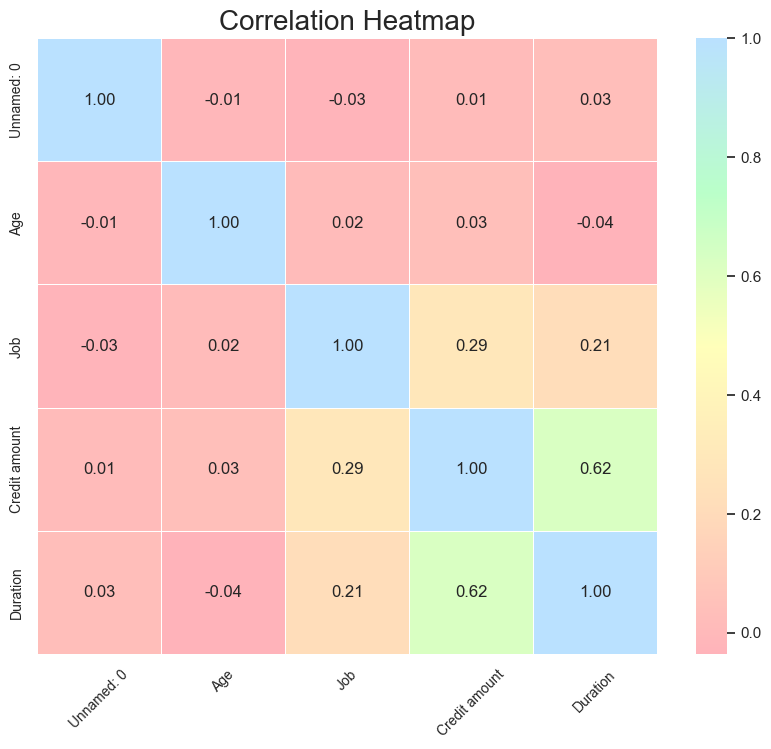

In [62]:
# Correlation Analysis

import matplotlib.colors as mcolors

# Define a custom pastel colormap
pastel_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_pastel", 
    ["#ffb3ba", "#ffdfba", "#ffffba", "#baffc9", "#bae1ff"]
)

# Numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix
correlation_matrix = numeric_data.corr()

# Creating the heatmap 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=pastel_cmap, linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()


This correlation heatmap provides a visual representation of the relationships between different numeric variables.

Age and other variables: Age shows very weak correlations with all other variables, suggesting it doesn't strongly influence or is not strongly influenced by the other measured aspects.

Job and other variables: The 'Job' variable shows a moderate correlation with 'Credit amount' and 'Duration', hinting that the type of job might influence the credit amount and loan duration to some extent.

Credit amount and Duration: There's a strong positive correlation (0.62) between 'Credit amount' and 'Duration', indicating that higher loan amounts tend to have longer repayment periods.

Credit amount and Job: A moderate correlation (0.29) suggests that the nature of one's job could be somewhat associated with the amount of credit granted.

## Balancing the data 

In [64]:
# Balancing the data for analytical purpose
bad_counts = data['Risk'].value_counts()['bad']

good_counts_sample = data[data['Risk']=='good'].sample(bad_counts)
bad_counts_sample = data[data['Risk']=='bad']

# Concatinating both sample
data_sample = pd.concat([good_counts_sample, bad_counts_sample])
data_sample['Risk'].value_counts()

Risk
bad     300
good    300
Name: count, dtype: int64